**Plots for first 100 Features**

Mounted at /content/drive/


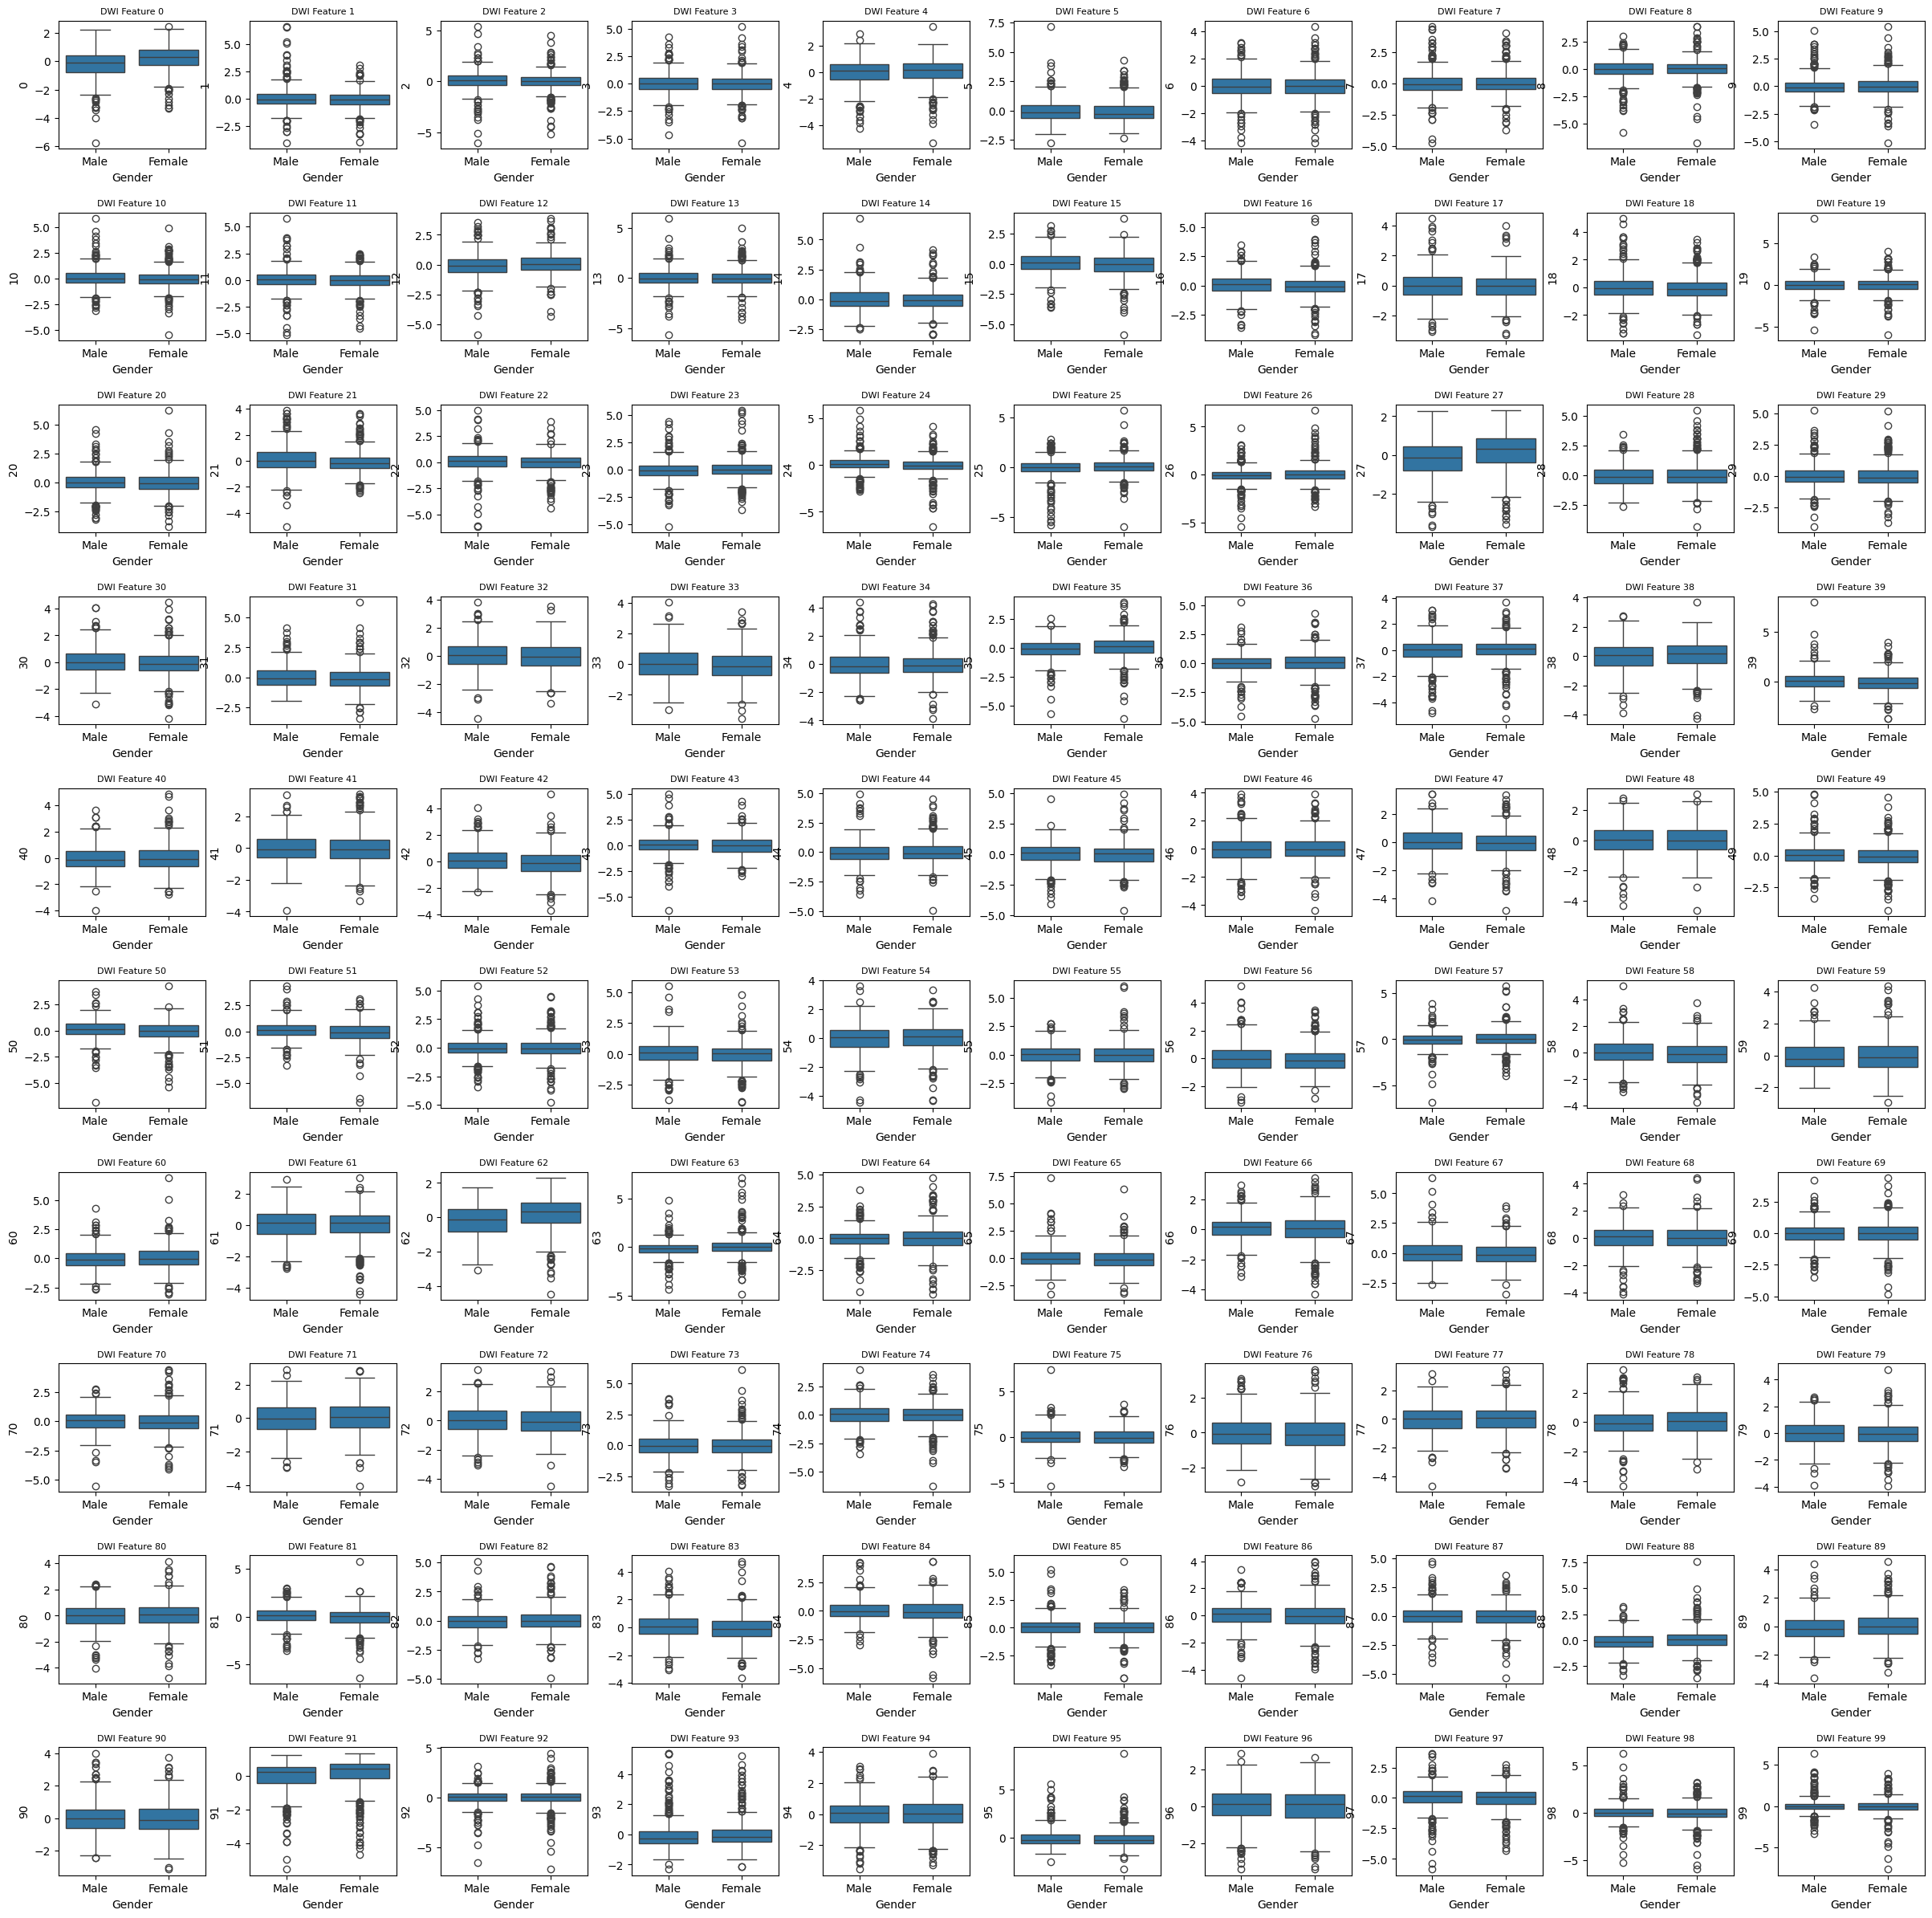

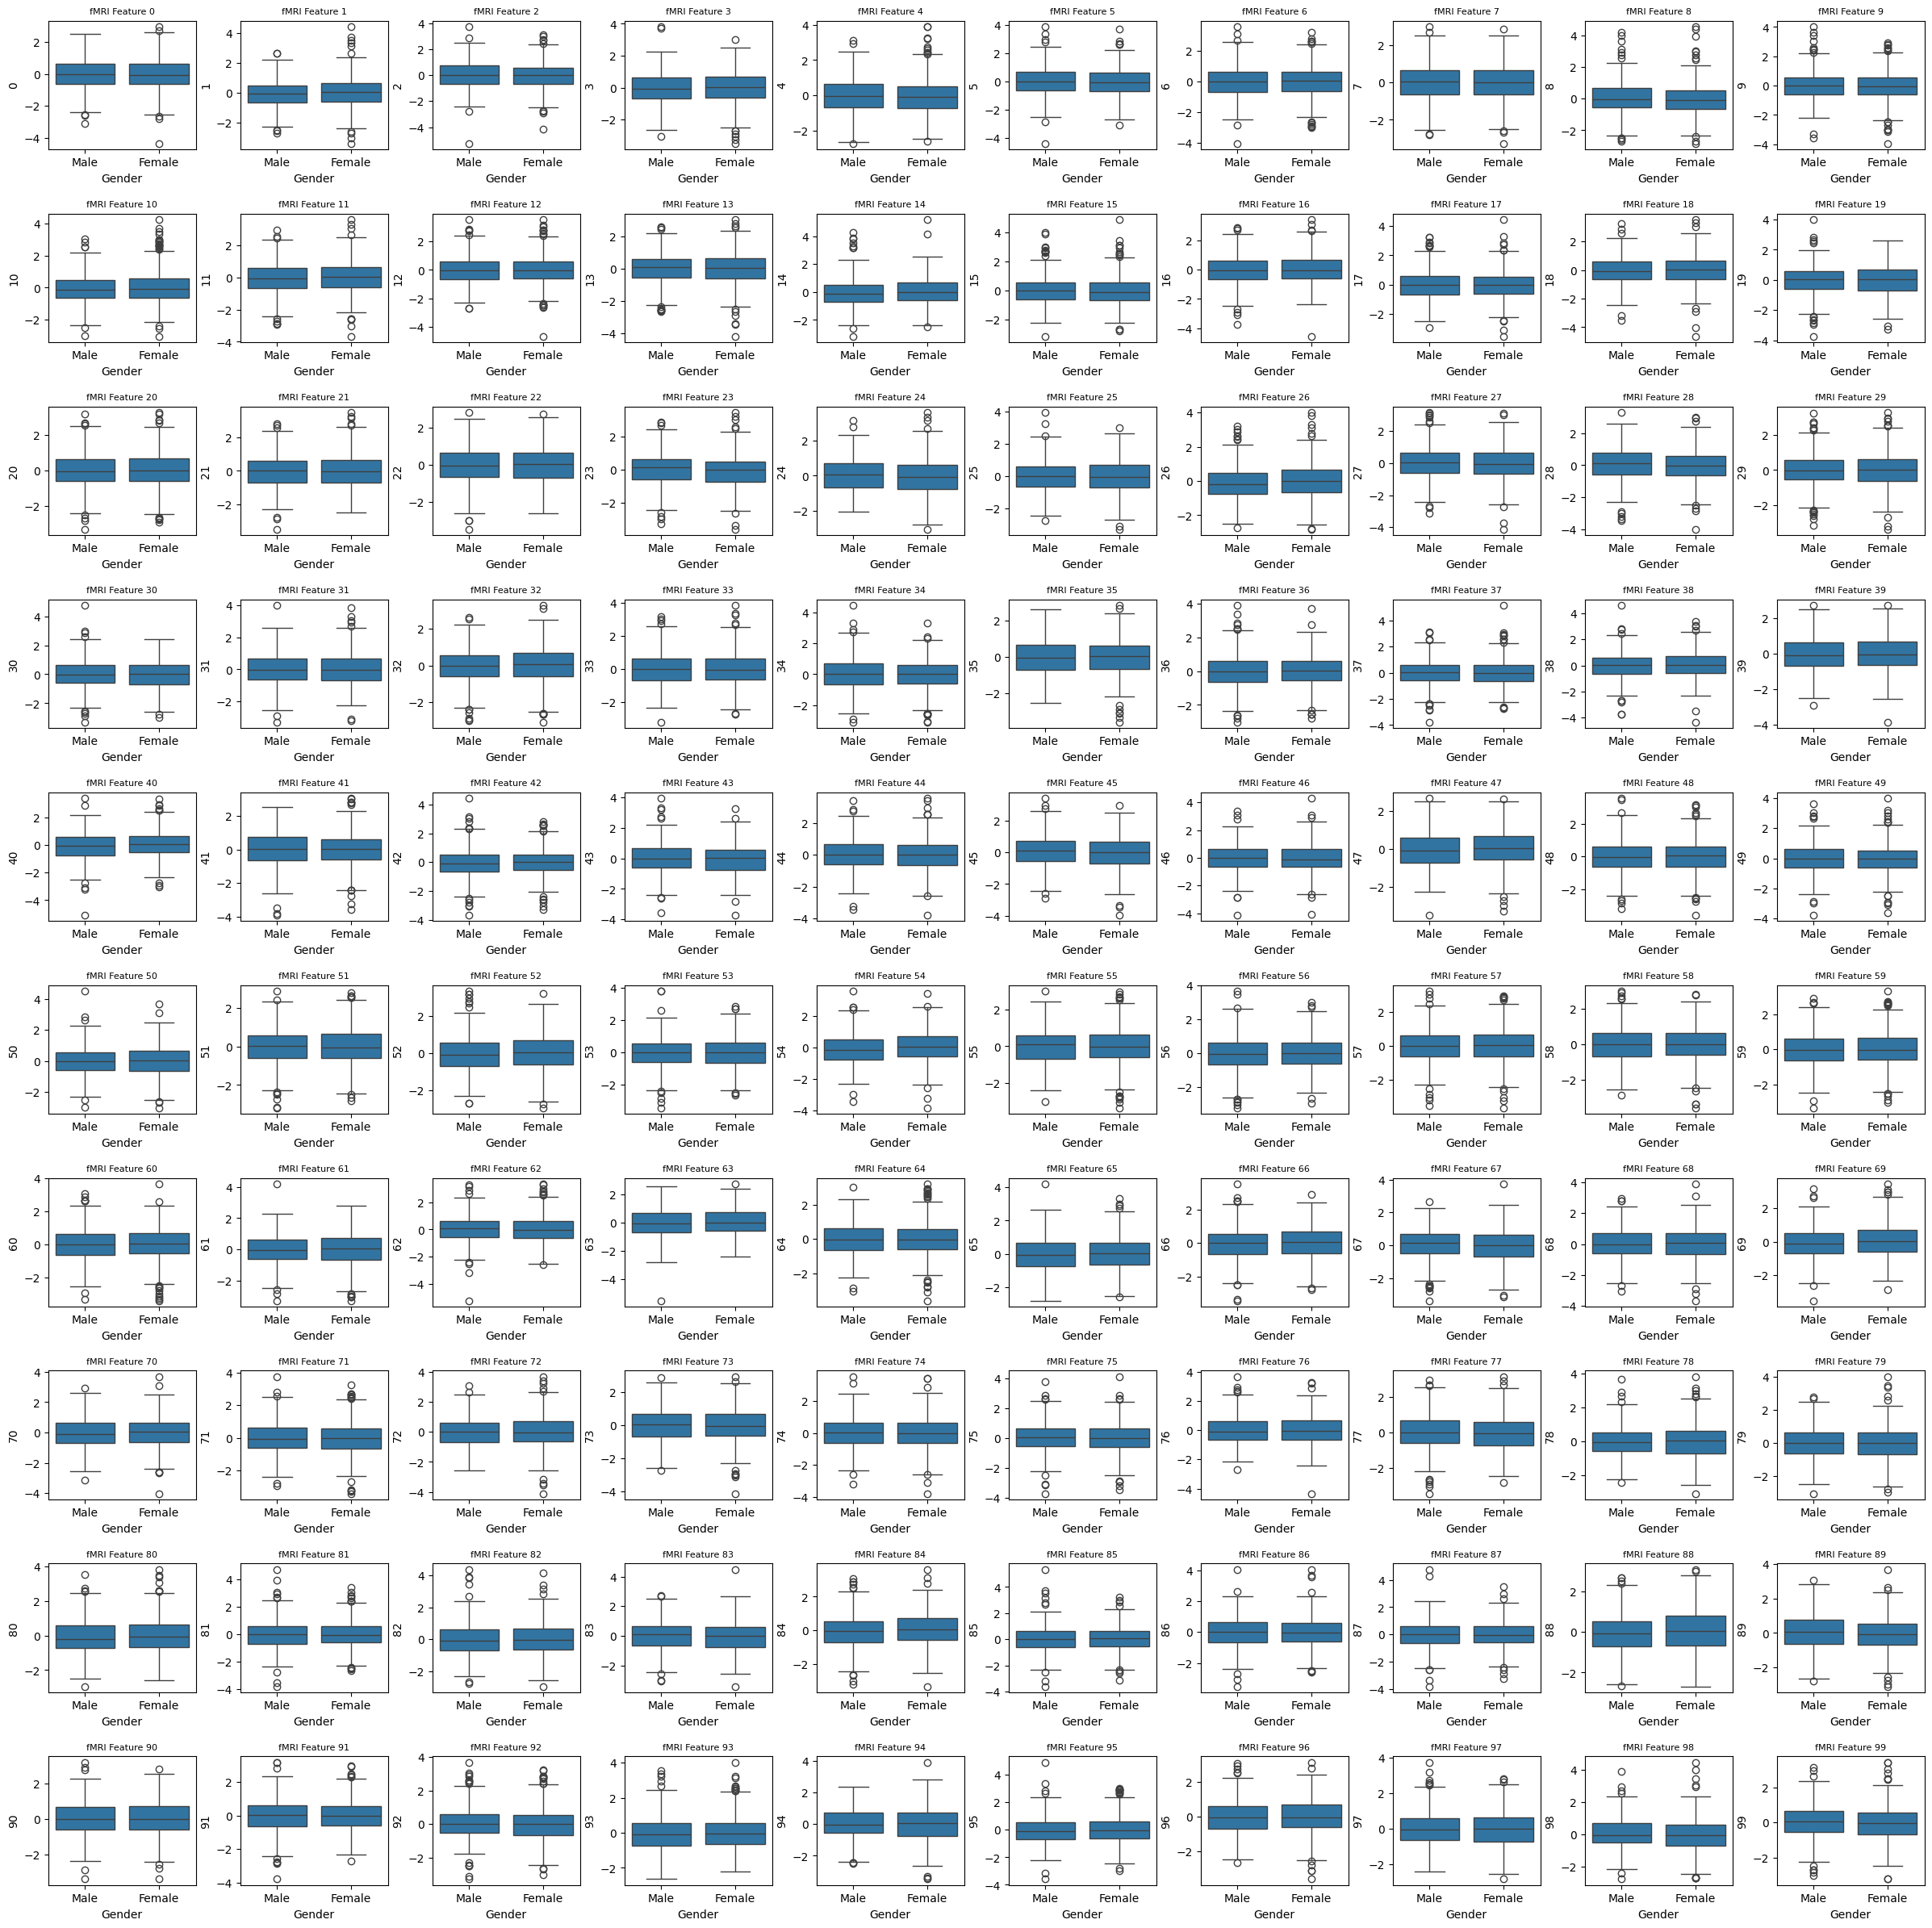

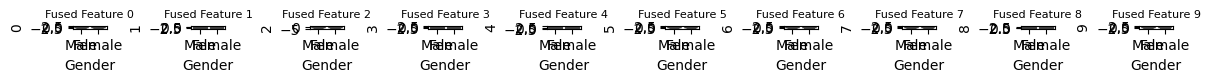

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

# 1. Loading the Features and Labels
X_fmri = np.load('/content/drive/MyDrive/Colab Notebooks/ML_Project/selected_tangent_embeddings.npy')
X_dwi = np.load('/content/drive/MyDrive/Colab Notebooks/ML_Project/selected_l1_features_embeddings.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/ML_Project/dwi-labels.npy')

# 2. Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler_fmri = StandardScaler()
scaler_dwi = StandardScaler()
X_fmri_scaled = scaler_fmri.fit_transform(X_fmri)
X_dwi_scaled = scaler_dwi.fit_transform(X_dwi)

# 3. Create DataFrames for Plotting
df_fmri = pd.DataFrame(X_fmri_scaled)
df_fmri['Gender'] = labels
df_fmri['Gender'] = df_fmri['Gender'].map({0: 'Female', 1: 'Male'})

df_dwi = pd.DataFrame(X_dwi_scaled)
df_dwi['Gender'] = labels
df_dwi['Gender'] = df_dwi['Gender'].map({0: 'Female', 1: 'Male'})

# 4. Create Box Plots
# DWI Features
plt.figure(figsize=(30, 30))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(x='Gender', y=i, data=df_dwi)
    plt.title(f'DWI Feature {i}', fontsize=8)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# fMRI Features
plt.figure(figsize=(30, 30))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(x='Gender', y=i, data=df_fmri)
    plt.title(f'fMRI Feature {i}', fontsize=8)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# Fused Features
X_fused = np.hstack([X_fmri_scaled, X_dwi_scaled])
df_fused = pd.DataFrame(X_fused)
df_fused['Gender'] = labels
df_fused['Gender'] = df_fused['Gender'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(x='Gender', y=i, data=df_fused)
    plt.title(f'Fused Feature {i}', fontsize=8)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout()
plt.show()

**6 subplots for each category**

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


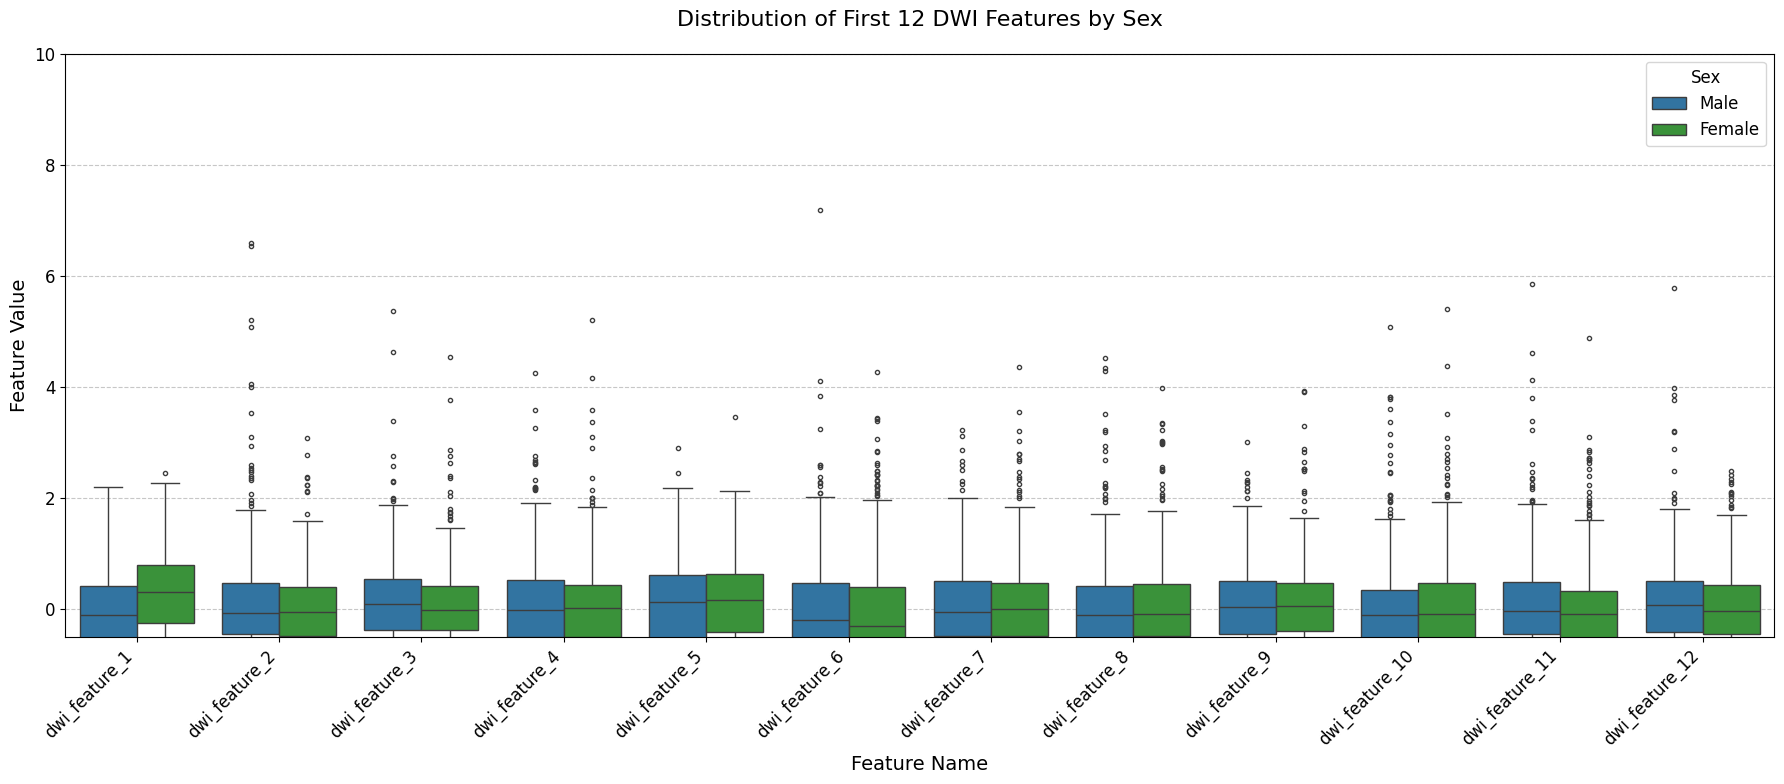

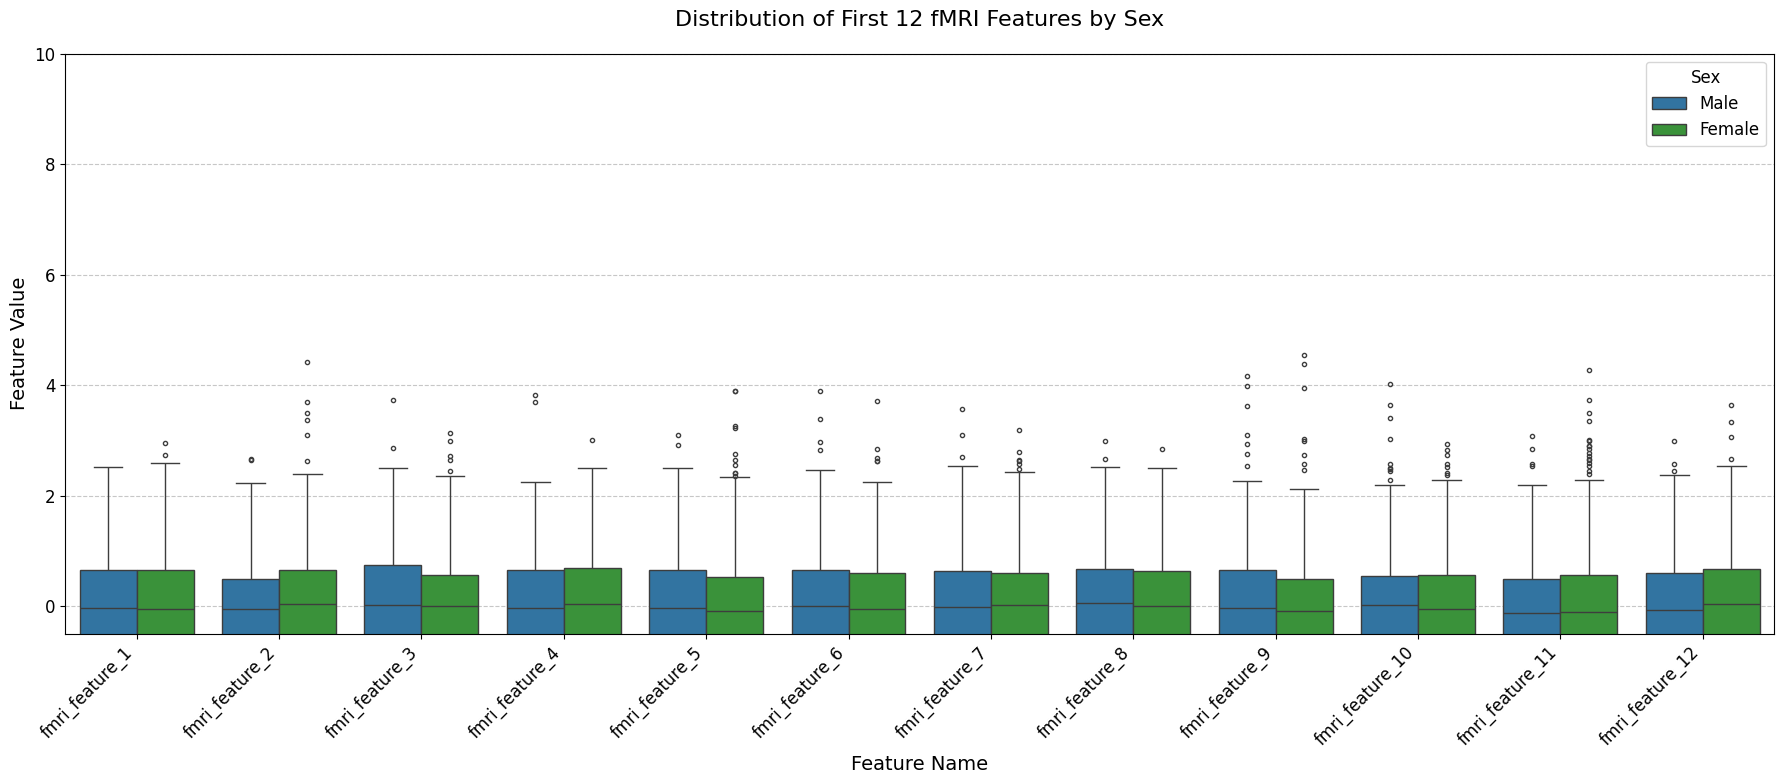

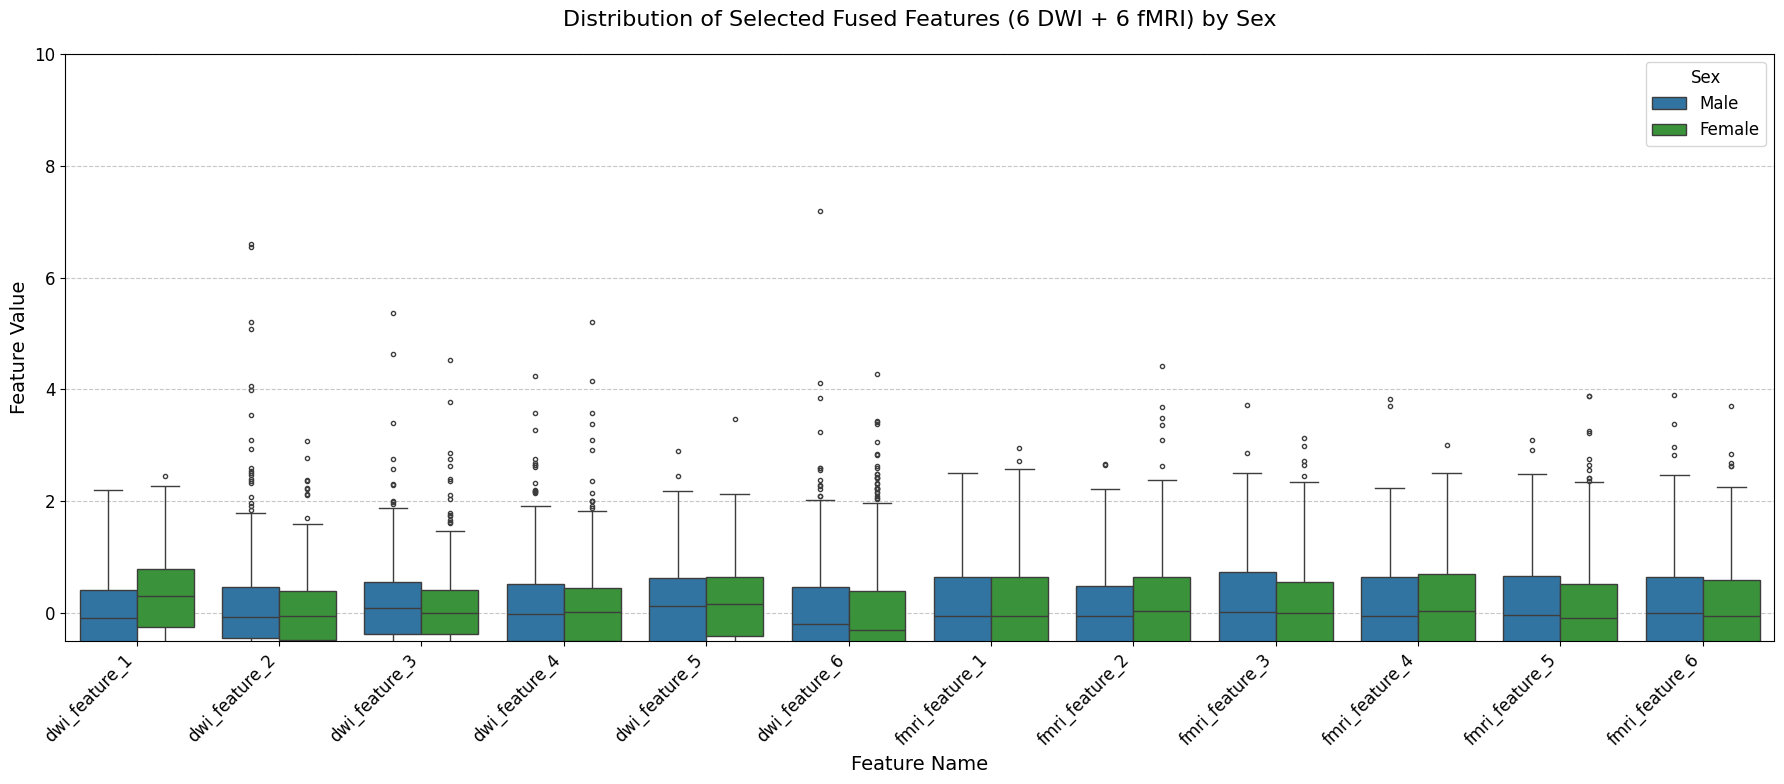

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

# 1. Loading the Features and Labels
X_fmri = np.load('/content/drive/MyDrive/Colab Notebooks/ML_Project/selected_tangent_embeddings.npy')
X_dwi = np.load('/content/drive/MyDrive/Colab Notebooks/ML_Project/selected_l1_features_embeddings.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/ML_Project/dwi-labels.npy')

# 2. Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler_fmri = StandardScaler()
scaler_dwi = StandardScaler()
X_fmri_scaled = scaler_fmri.fit_transform(X_fmri)
X_dwi_scaled = scaler_dwi.fit_transform(X_dwi)

# 3. Create DataFrames for Plotting
df_fmri = pd.DataFrame(X_fmri_scaled)
df_fmri['Gender'] = labels
df_fmri['Gender'] = df_fmri['Gender'].map({0: 'Female', 1: 'Male'})

df_dwi = pd.DataFrame(X_dwi_scaled)
df_dwi['Gender'] = labels
df_dwi['Gender'] = df_dwi['Gender'].map({0: 'Female', 1: 'Male'})

# 4. Create Fused Features DataFrame
X_fused = np.hstack([X_dwi_scaled[:, :6], X_fmri_scaled[:, :6]])
df_fused = pd.DataFrame(X_fused)
df_fused['Gender'] = labels
df_fused['Gender'] = df_fused['Gender'].map({0: 'Female', 1: 'Male'})

# Prepare feature names for the x-axis
dwi_features = [f"dwi_feature_{i+1}" for i in range(12)]
fmri_features = [f"fmri_feature_{i+1}" for i in range(12)]
fused_features = [f"dwi_feature_{i+1}" for i in range(6)] + [f"fmri_feature_{i+1}" for i in range(6)]

# Reshape data for seaborn boxplot (long format)
dwi_long = pd.melt(df_dwi.iloc[:, :12].join(df_dwi['Gender']),
                  id_vars=['Gender'],
                  value_vars=list(range(12)),
                  var_name='Feature',
                  value_name='Value')
dwi_long['Feature'] = dwi_long['Feature'].map({i: name for i, name in enumerate(dwi_features)})

fmri_long = pd.melt(df_fmri.iloc[:, :12].join(df_fmri['Gender']),
                   id_vars=['Gender'],
                   value_vars=list(range(12)),
                   var_name='Feature',
                   value_name='Value')
fmri_long['Feature'] = fmri_long['Feature'].map({i: name for i, name in enumerate(fmri_features)})

# For fused features
fused_df = pd.DataFrame()
for i, col in enumerate(fused_features):
    if i < 6:
        fused_df[col] = df_fused.iloc[:, i]  # First 6 columns are DWI
    else:
        fused_df[col] = df_fused.iloc[:, i]  # Next 6 columns are fMRI
fused_df['Gender'] = df_fused['Gender']

fused_long = pd.melt(fused_df,
                    id_vars=['Gender'],
                    value_vars=fused_features,
                    var_name='Feature',
                    value_name='Value')

# Define figure properties
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

# Create the DWI plot
plt.figure(figsize=(18, 8))
plt.title('Distribution of First 12 DWI Features by Sex', fontsize=16, pad=20)
sns.boxplot(x='Feature', y='Value', hue='Gender', data=dwi_long,
            palette={'Male': '#1F77B4', 'Female': '#2CA02C'},
            fliersize=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Feature Name', fontsize=14)
plt.ylabel('Feature Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(-0.5, 10)
plt.legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()

# Create the fMRI plot
plt.figure(figsize=(18, 8))
plt.title('Distribution of First 12 fMRI Features by Sex', fontsize=16, pad=20)
sns.boxplot(x='Feature', y='Value', hue='Gender', data=fmri_long,
            palette={'Male': '#1F77B4', 'Female': '#2CA02C'},
            fliersize=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Feature Name', fontsize=14)
plt.ylabel('Feature Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(-0.5, 10)
plt.legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()

# Create the Fused Features plot
plt.figure(figsize=(18, 8))
plt.title('Distribution of Selected Fused Features (6 DWI + 6 fMRI) by Sex', fontsize=16, pad=20)
sns.boxplot(x='Feature', y='Value', hue='Gender', data=fused_long,
            palette={'Male': '#1F77B4', 'Female': '#2CA02C'},
            fliersize=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Feature Name', fontsize=14)
plt.ylabel('Feature Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(-0.5, 10)
plt.legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()

**Hypothesis Testing (Wilcoxon Ranksum Test) + FDR Correction**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

from google.colab import drive
drive.mount('/content/drive/')

# Configuration
# File Paths for the selected feature sets
FMRI_SELECTED_FEATURES_FILE = '/content/drive/MyDrive/Colab Notebooks/ML_Project/selected_tangent_embeddings.npy'
DWI_SELECTED_FEATURES_FILE = '/content/drive/MyDrive/Colab Notebooks/ML_Project/selected_l1_features_embeddings.npy'
LABEL_FILE = '/content/drive/MyDrive/Colab Notebooks/ML_Project/dwi-labels.npy'

# Analysis Parameters
SIGNIFICANCE_LEVELS = [0.05, 0.10] # Alpha levels for tests
FDR_METHOD = 'fdr_bh'     # FDR correction method

print("--- Configuration ---")
print(f"fMRI Feature File (Selected): {FMRI_SELECTED_FEATURES_FILE}")
print(f"DWI Feature File (Selected L1): {DWI_SELECTED_FEATURES_FILE}")
print(f"Label File: {LABEL_FILE}")
print(f"Significance Levels: {SIGNIFICANCE_LEVELS}")
print(f"FDR Method: {FDR_METHOD}")
print("-" * 21)

# Part 1: Load Data (Selected Features and Labels)
print("\n--- Part 1: Loading Selected Features and Labels ---")
try:
    # Load selected fMRI features
    X_fmri_selected = np.load(FMRI_SELECTED_FEATURES_FILE)
    if X_fmri_selected.ndim != 2:
        raise ValueError(f"fMRI features must be 2D, but shape is {X_fmri_selected.shape}")
    print(f"Loaded Selected fMRI Features. Shape: {X_fmri_selected.shape}")
    n_features_fmri = X_fmri_selected.shape[1]

    # Load selected DWI features
    X_dwi_selected = np.load(DWI_SELECTED_FEATURES_FILE)
    if X_dwi_selected.ndim != 2:
        raise ValueError(f"Selected DWI features must be 2D, but shape is {X_dwi_selected.shape}")
    print(f"Loaded Selected DWI (L1) Features. Shape: {X_dwi_selected.shape}")
    n_features_dwi = X_dwi_selected.shape[1]

    # Load Labels
    y_labels = np.load(LABEL_FILE)
    print(f"Loaded Labels. Shape: {y_labels.shape}")

    # Basic Validation
    n_samples = y_labels.shape[0]
    if X_fmri_selected.shape[0] != n_samples or X_dwi_selected.shape[0] != n_samples:
        raise ValueError("Sample size mismatch between loaded features and labels.")
    print(f"Data shapes validated for {n_samples} samples.")

except FileNotFoundError as e:
    print(f"--- ERROR: File not found: {e}. Cannot proceed without data. ---")
    exit()
except ValueError as e:
    print(f"--- ERROR: Data validation failed: {e}. Cannot proceed. ---")
    exit()
except Exception as e:
    print(f"--- ERROR: An unexpected error occurred during data loading: {e} ---")
    exit()

# Part 2: Statistical Analysis (Wilcoxon Rank-Sum + FDR on Selected Features)

print("\n--- Part 2: Statistical Feature Analysis (Wilcoxon + FDR) ---")
print("Note: Analysis performed on the loaded (potentially pre-selected) feature sets.")

# 2a. Separate Features by Gender
X_fmri_male = X_fmri_selected[y_labels == 1]
X_fmri_female = X_fmri_selected[y_labels == 0]
X_dwi_male = X_dwi_selected[y_labels == 1]
X_dwi_female = X_dwi_selected[y_labels == 0]

if len(X_fmri_male) == 0 or len(X_fmri_female) == 0:
    print("--- ERROR: Data for both genders (labels 0 and 1) must be present. Cannot proceed. ---")
    exit()

# 2b. Perform Wilcoxon Test for ALL Loaded Features & Store P-values
all_p_values_fmri = np.ones(n_features_fmri) # Initialize with non-significant p-value
all_indices_fmri = np.arange(n_features_fmri)
print("Performing Wilcoxon tests for loaded fMRI features...")
for i in range(n_features_fmri):
    try:
        stat, p_value = ranksums(X_fmri_male[:, i], X_fmri_female[:, i])
        if not np.isnan(p_value): all_p_values_fmri[i] = p_value
    except ValueError: pass # Keep p_value=1.0 if error

all_p_values_dwi = np.ones(n_features_dwi)
all_indices_dwi = np.arange(n_features_dwi)
print("Performing Wilcoxon tests for loaded DWI features...")
for i in range(n_features_dwi):
    try:
        stat, p_value = ranksums(X_dwi_male[:, i], X_dwi_female[:, i])
        if not np.isnan(p_value): all_p_values_dwi[i] = p_value
    except ValueError: pass

print("Wilcoxon tests complete.")

# 2c. Process Results for Each Significance Level
print("\n--- Wilcoxon & FDR Results on Loaded Feature Sets ---")
results_stats = {}

for alpha in SIGNIFICANCE_LEVELS:
    print(f"\n=== Processing for Alpha = {alpha} ===")
    alpha_key = f"alpha_{alpha}"
    results_stats[alpha_key] = {}

    # Uncorrected Significance
    sig_fmri_unc = all_indices_fmri[all_p_values_fmri < alpha]
    sig_dwi_unc = all_indices_dwi[all_p_values_dwi < alpha]
    common_unc = list(set(sig_fmri_unc) & set(sig_dwi_unc))
    results_stats[alpha_key]['sig_fmri_uncorrected'] = sig_fmri_unc
    results_stats[alpha_key]['sig_dwi_uncorrected'] = sig_dwi_unc
    results_stats[alpha_key]['common_uncorrected'] = common_unc
    print(f" Uncorrected Significant fMRI: {len(sig_fmri_unc)}")
    print(f" Uncorrected Significant DWI: {len(sig_dwi_unc)}")
    print(f" Uncorrected Common: {len(common_unc)}")

    # FDR Correction (Benjamini-Hochberg)
    reject_fmri, _, _, _ = multipletests(all_p_values_fmri, alpha=alpha, method=FDR_METHOD, is_sorted=False)
    sig_fmri_fdr = all_indices_fmri[reject_fmri]

    reject_dwi, _, _, _ = multipletests(all_p_values_dwi, alpha=alpha, method=FDR_METHOD, is_sorted=False)
    sig_dwi_fdr = all_indices_dwi[reject_dwi]

    common_fdr = list(set(sig_fmri_fdr) & set(sig_dwi_fdr))
    results_stats[alpha_key]['sig_fmri_fdr'] = sig_fmri_fdr
    results_stats[alpha_key]['sig_dwi_fdr'] = sig_dwi_fdr
    results_stats[alpha_key]['common_fdr'] = common_fdr
    print(f" FDR Corrected Significant fMRI: {len(sig_fmri_fdr)}")
    print(f" FDR Corrected Significant DWI: {len(sig_dwi_fdr)}")
    print(f" FDR Corrected Common: {len(common_fdr)}")

# Print specific lists of significant feature indices (indices within the loaded files)
# print(f"\nSignificant fMRI indices (FDR < 0.05): {results_stats['alpha_0.05']['sig_fmri_fdr'].tolist()}")
# print(f"\nSignificant DWI indices (FDR < 0.05): {results_stats['alpha_0.05']['sig_dwi_fdr'].tolist()}")
# print(f"\nCommon indices (FDR < 0.05): {sorted(results_stats['alpha_0.05']['common_fdr'])}")

print("\n--- Statistical Analysis Script Finished ---")

Mounted at /content/drive/
--- Configuration ---
fMRI Feature File (Selected): /content/drive/MyDrive/Colab Notebooks/ML_Project/selected_tangent_embeddings.npy
DWI Feature File (Selected L1): /content/drive/MyDrive/Colab Notebooks/ML_Project/selected_l1_features_embeddings.npy
Label File: /content/drive/MyDrive/Colab Notebooks/ML_Project/dwi-labels.npy
Significance Levels: [0.05, 0.1]
FDR Method: fdr_bh
---------------------

--- Part 1: Loading Selected Features and Labels ---
Loaded Selected fMRI Features. Shape: (787, 1702)
Loaded Selected DWI (L1) Features. Shape: (787, 1189)
Loaded Labels. Shape: (787,)
Data shapes validated for 787 samples.

--- Part 2: Statistical Feature Analysis (Wilcoxon + FDR) ---
Note: Analysis performed on the loaded (potentially pre-selected) feature sets.
Performing Wilcoxon tests for loaded fMRI features...
Performing Wilcoxon tests for loaded DWI features...
Wilcoxon tests complete.

--- Wilcoxon & FDR Results on Loaded Feature Sets ---

=== Processin

**Final Box Plots (DWI, fMRI, Fused)**


Shape of the combined DataFrame for plotting: (4550434, 3)
      Value Gender Feature Type
0  0.584236   Male          DWI
1 -0.181649   Male          DWI
2 -0.423262   Male          DWI
3  0.886274   Male          DWI
4  0.148109   Male          DWI


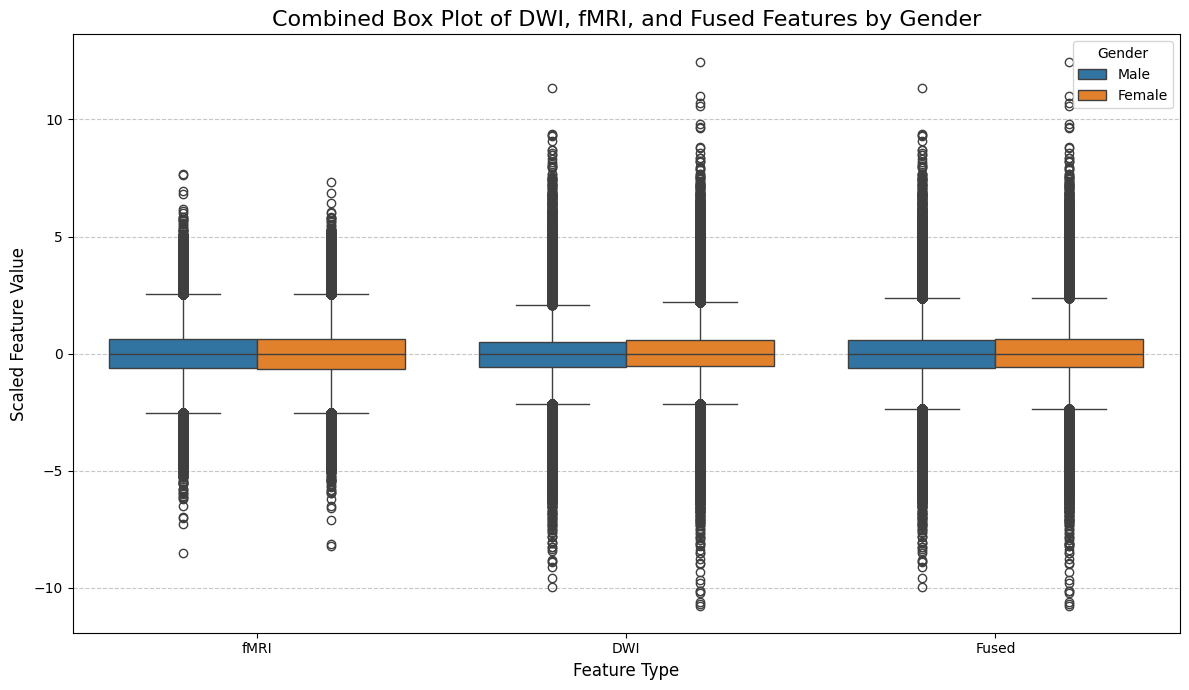

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

try:

    base_path = '/content/drive/MyDrive/Colab Notebooks/ML_Project/'
    X_fmri = np.load(base_path + 'selected_tangent_embeddings.npy')
    X_dwi = np.load(base_path + 'selected_l1_features_embeddings.npy')
    labels = np.load(base_path + 'dwi-labels.npy')

except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure the file paths are correct and the Drive is mounted (if using Google Drive).")
    # creating dummy data for demonstration
    print("\n--- Creating dummy data for demonstration ---")
    n_samples = 100
    n_fmri_features = 50
    n_dwi_features = 70
    X_fmri = np.random.randn(n_samples, n_fmri_features) + (labels.reshape(-1, 1) * 0.4)
    X_dwi = np.random.randn(n_samples, n_dwi_features) + (labels.reshape(-1, 1) * 0.5)
    # labels = np.random.randint(0, 2, n_samples)
    print(f"Using dummy data: {n_samples=}, {n_fmri_features=}, {n_dwi_features=}")

# 2. Feature Scaling
scaler_fmri = StandardScaler()
scaler_dwi = StandardScaler()
X_fmri_scaled = scaler_fmri.fit_transform(X_fmri)
X_dwi_scaled = scaler_dwi.fit_transform(X_dwi)

# 3. Fuse Features
X_fused = np.hstack([X_fmri_scaled, X_dwi_scaled])
X_fused_scaled = X_fused

# 4. Prepare Data for Combined Plotting
gender_map = {0: 'Female', 1: 'Male'}
gender_labels_str = pd.Series(labels).map(gender_map).values

all_data_list = []

# Process DWI
n_samples_dwi, n_features_dwi = X_dwi_scaled.shape
for i in range(n_samples_dwi):
    for j in range(n_features_dwi):
        all_data_list.append({
            'Value': X_dwi_scaled[i, j],
            'Gender': gender_labels_str[i],
            'Feature Type': 'DWI'
        })

# Process fMRI
n_samples_fmri, n_features_fmri = X_fmri_scaled.shape
for i in range(n_samples_fmri):
    for j in range(n_features_fmri):
        all_data_list.append({
            'Value': X_fmri_scaled[i, j],
            'Gender': gender_labels_str[i],
            'Feature Type': 'fMRI'
        })

# Process Fused
n_samples_fused, n_features_fused = X_fused_scaled.shape
for i in range(n_samples_fused):
    for j in range(n_features_fused):
        all_data_list.append({
            'Value': X_fused_scaled[i, j],
            'Gender': gender_labels_str[i],
            'Feature Type': 'Fused'
        })

# Create DataFrame from the list of dictionaries
df_combined = pd.DataFrame(all_data_list)

print("\nShape of the combined DataFrame for plotting:", df_combined.shape)
print(df_combined.head())

# 5. Create the Combined Box Plot
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_combined, x='Feature Type', y='Value', hue='Gender',
            order=['fMRI', 'DWI', 'Fused'],
            palette='tab10')

plt.title('Combined Box Plot of DWI, fMRI, and Fused Features by Gender', fontsize=16)
plt.xlabel('Feature Type', fontsize=12)
plt.ylabel('Scaled Feature Value', fontsize=12)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **ROC Curves**

**ROC for DWI**

--- Configuration ---
Test Size: 0.2
Random State: 42
Target k for SKB/RFE: 500
C for L1 Selector: 0.1
C for final SVM model: 1.0
---------------------
Validated ORIGINAL features ('tangent_features') shape: (787, 3403)

Data split complete.
Data scaled. Train shape: (629, 3403)

Models defined: ['RF', 'XGB', 'LGBM', 'SVM']
Distinct selector types defined: ['SKB(k=500)', 'RFE(k=500)', 'L1Select(C=0.1)', 'None']

--- Starting Pipeline Evaluation (All Combinations) ---
-----------------------------------
Processing Pipeline: RF + SKB(k=500)
Applying SKB(k=500)...
Shape after selection: Train=(629, 500), Test=(158, 500)
Training RF...
Predicting probabilities...
--> Pipeline AUC: 0.8739
-----------------------------------
Processing Pipeline: RF + RFE(k=500)
Applying RFE(k=500)...
Shape after selection: Train=(629, 500), Test=(158, 500)
Training RF...
Predicting probabilities...
--> Pipeline AUC: 0.9078
-----------------------------------
Processing Pipeline: RF + L1Select(C=0.1)
Applying

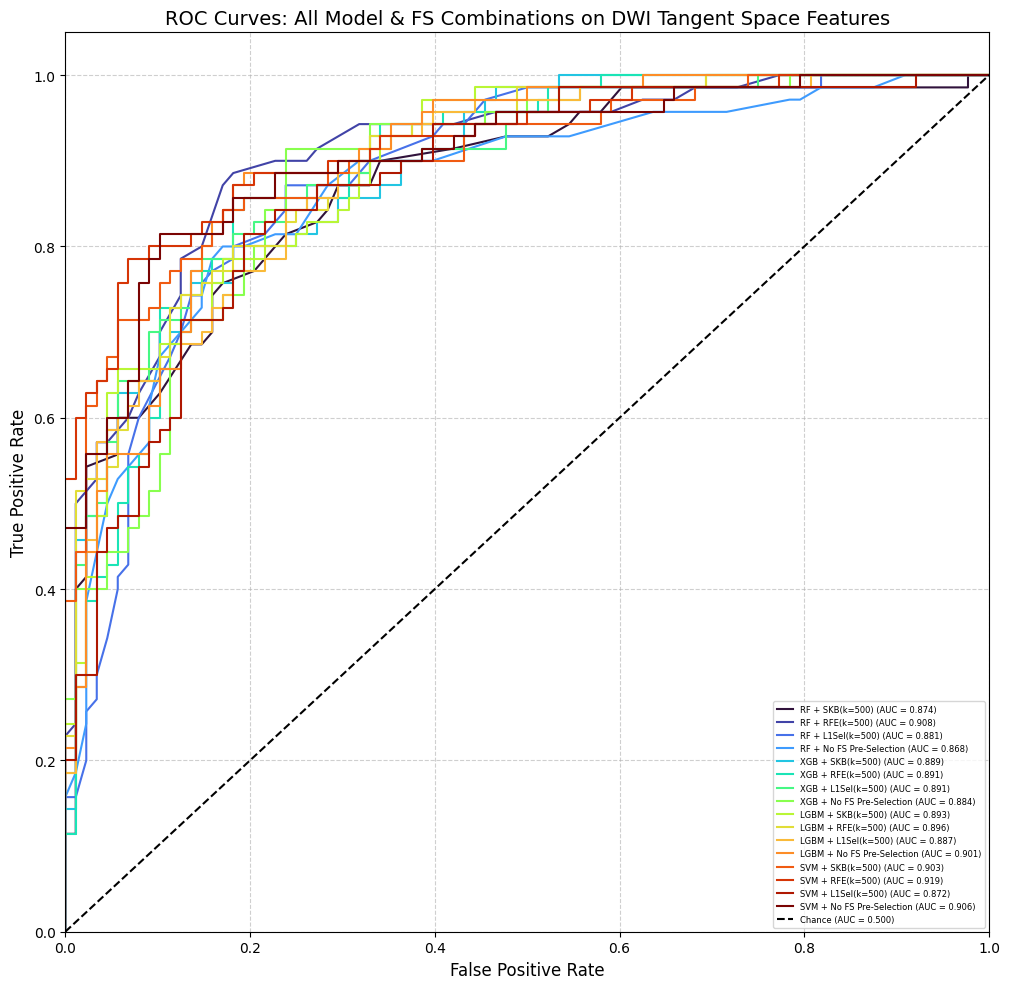


--- ROC Plot Generation Complete (16 pipelines plotted) ---


In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/ML_Project/tangent_features.pkl', 'rb') as file:
    tangent_features = pickle.load(file)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Configuration
TEST_SIZE = 0.2
RANDOM_STATE = 42
K_FEATURES_TARGET = 500   # k for SelectKBest/RFE
C_L1_SELECTOR = 0.1     # C for L1-based selector
SVM_C = 1.0             # C for the final SVM model

print(f"--- Configuration ---")
print(f"Test Size: {TEST_SIZE}")
print(f"Random State: {RANDOM_STATE}")
print(f"Target k for SKB/RFE: {K_FEATURES_TARGET}")
print(f"C for L1 Selector: {C_L1_SELECTOR}")
print(f"C for final SVM model: {SVM_C}")
print("-" * 21)


# Load Data
label_source_info = "dwi-labels.npy (assumed loaded into 'labels')"
try:
    if 'tangent_features' not in locals() and 'tangent_features' not in globals():
         raise NameError("'tangent_features' variable not found.")
    if isinstance(tangent_features, pd.DataFrame):
        X_original_features = tangent_features.values
    elif not isinstance(tangent_features, np.ndarray):
        X_original_features = np.array(tangent_features)
    else: X_original_features = tangent_features
    if 'labels' not in locals() and 'labels' not in globals():
         raise NameError(f"'labels' variable not found.")
    if not isinstance(labels, np.ndarray): y_original_labels = np.array(labels)
    else: y_original_labels = labels
    if X_original_features.shape[0] != len(y_original_labels): raise ValueError("Shape mismatch")
    if X_original_features.ndim != 2: raise ValueError("Features must be 2D")
    print(f"Validated ORIGINAL features ('tangent_features') shape: {X_original_features.shape}")
    n_original_features = X_original_features.shape[1]
except (NameError, FileNotFoundError, ValueError) as e:
    print(f"--- ERROR LOADING/VALIDATING DATA: {e} --- Using dummy data. ---")
    n_samples, n_original_features = 100, 1000
    X_original_features = np.random.rand(n_samples, n_original_features)
    y_original_labels = np.random.randint(0, 2, n_samples)
    print(f"Using dummy data. Shape: {X_original_features.shape}")

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_original_features, y_original_labels, test_size=TEST_SIZE,
    random_state=RANDOM_STATE, stratify=y_original_labels
)
print(f"\nData split complete.")

# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Data scaled. Train shape: {X_train_scaled.shape}")

# Define Models
models = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'XGB': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE),
    'LGBM': LGBMClassifier(random_state=RANDOM_STATE, verbosity=-1),
    'SVM': SVC(kernel='linear', probability=True, random_state=RANDOM_STATE, C=SVM_C)
}
print(f"\nModels defined: {list(models.keys())}")

# Define Distinct Feature Selector Types
k_features = min(K_FEATURES_TARGET, n_original_features)
if k_features < K_FEATURES_TARGET:
    print(f"Warning: Requested k={K_FEATURES_TARGET} features, using actual k={k_features}.")

rfe_estimator = LogisticRegression(penalty='l2', solver='liblinear', max_iter=500, random_state=RANDOM_STATE)

# mapping selector name to its configured instance
distinct_selectors = {
    f'SKB(k={k_features})': SelectKBest(f_classif, k=k_features),
    f'RFE(k={k_features})': RFE(estimator=rfe_estimator, n_features_to_select=k_features),
    f'L1Select(C={C_L1_SELECTOR})': LogisticRegression(penalty='l1', solver='liblinear', C=C_L1_SELECTOR, max_iter=1000, random_state=RANDOM_STATE),
    'None': None
}
print(f"Distinct selector types defined: {list(distinct_selectors.keys())}")

# Create the plot
plt.figure(figsize=(12, 10))
n_pipelines = len(models) * len(distinct_selectors)
colors = plt.cm.turbo(np.linspace(0, 1, n_pipelines))
color_idx = 0
print("\n--- Starting Pipeline Evaluation (All Combinations) ---")

# Nested Loops for All Combinations
for model_name, model in models.items():
    for selector_name, selector_instance in distinct_selectors.items():
        print("-" * 35)
        print(f"Processing Pipeline: {model_name} + {selector_name}")

        X_train_sel = X_train_scaled
        X_test_sel = X_test_scaled
        actual_k = n_original_features
        current_label = f"{model_name} + {selector_name}"

        try:
            # Apply feature selection
            if selector_name == 'None':
                print("Applying no explicit feature selection.")
                actual_k = n_original_features
                current_label = f"{model_name} + No FS Pre-Selection"

            elif selector_name.startswith('L1Select'):
                print(f"Applying L1 pre-selection (via SelectFromModel)...")
                l1_model_for_selection = selector_instance
                # Using SelectFromModel, fitting the L1 model inside, selecting top k based on magnitude
                selector_wrapper = SelectFromModel(l1_model_for_selection, prefit=False, threshold=-np.inf, max_features=k_features)
                X_train_sel = selector_wrapper.fit_transform(X_train_scaled, y_train)
                X_test_sel = selector_wrapper.transform(X_test_scaled)
                actual_k = X_train_sel.shape[1]
                current_label = f"{model_name} + L1Sel(k={actual_k})"

            else: # Handling SKB and RFE
                print(f"Applying {selector_name}...")
                fs_instance = selector_instance
                X_train_sel = fs_instance.fit_transform(X_train_scaled, y_train)
                X_test_sel = fs_instance.transform(X_test_scaled)
                actual_k = X_train_sel.shape[1]

            # Checking if features remain
            if actual_k == 0:
                print(f"WARNING: Feature selection for {current_label} removed ALL features. Skipping.")
                continue

            print(f"Shape after selection: Train={X_train_sel.shape}, Test={X_test_sel.shape}")

            # Train the final model
            print(f"Training {model_name}...")
            # Re-initialize model to ensure clean state for each pipeline
            current_model = models[model_name]
            current_model.fit(X_train_sel, y_train)

            # Get predictions
            print("Predicting probabilities...")
            y_prob = current_model.predict_proba(X_test_sel)[:, 1]

            # Calculate and plot the ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            plot_label = f'{current_label} (AUC = {roc_auc:.3f})'
            plt.plot(fpr, tpr, color=colors[color_idx], lw=1.5, label=plot_label)
            print(f"--> Pipeline AUC: {roc_auc:.4f}")
            color_idx += 1

        except MemoryError as me:
            print(f"!!! MEMORY ERROR processing pipeline {current_label}: {me}")
        except ValueError as ve:
             print(f"!!! VALUE ERROR processing pipeline {current_label}: {ve}")
        except Exception as e:
            print(f"!!! An unexpected error occurred processing pipeline {current_label}: {e}")


# Add plot details
plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--', label='Chance (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves: All Model & FS Combinations on DWI Tangent Space Features', fontsize=14)
plt.legend(loc='lower right', fontsize=6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

print(f"\n--- ROC Plot Generation Complete ({color_idx} pipelines plotted) ---")

**ROC for fMRI**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Configuration ---
Test Size: 0.2, Random State: 42
Target k for SKB/RFE: 500
C for L1 Selector: 1.0
---------------------
--- ERROR LOADING/VALIDATING DATA: 'labels' variable not found. --- Using dummy data. ---
Using dummy data. Shape: (100, 1000)

Data split complete.
Data scaled. Train shape: (80, 1000)

Models defined: ['RF', 'XGB', 'LGBM']
Distinct selector types defined: ['SKB(k=500)', 'RFE(k=500)', 'L1Select(C=1.0)', 'None']

--- Starting Pipeline Evaluation (All Combinations for fMRI) ---
-----------------------------------
Processing Pipeline: RF + SKB(k=500)
Applying SKB(k=500)...
Shape after selection: Train=(80, 500), Test=(20, 500)
Training RF...
Predicting probabilities...
--> Pipeline AUC: 0.7879
-----------------------------------
Processing Pipeline: RF + RFE(k=500)
Applying RFE(k=500)...
Shape after selection: Train=(80, 500), Test=(20, 

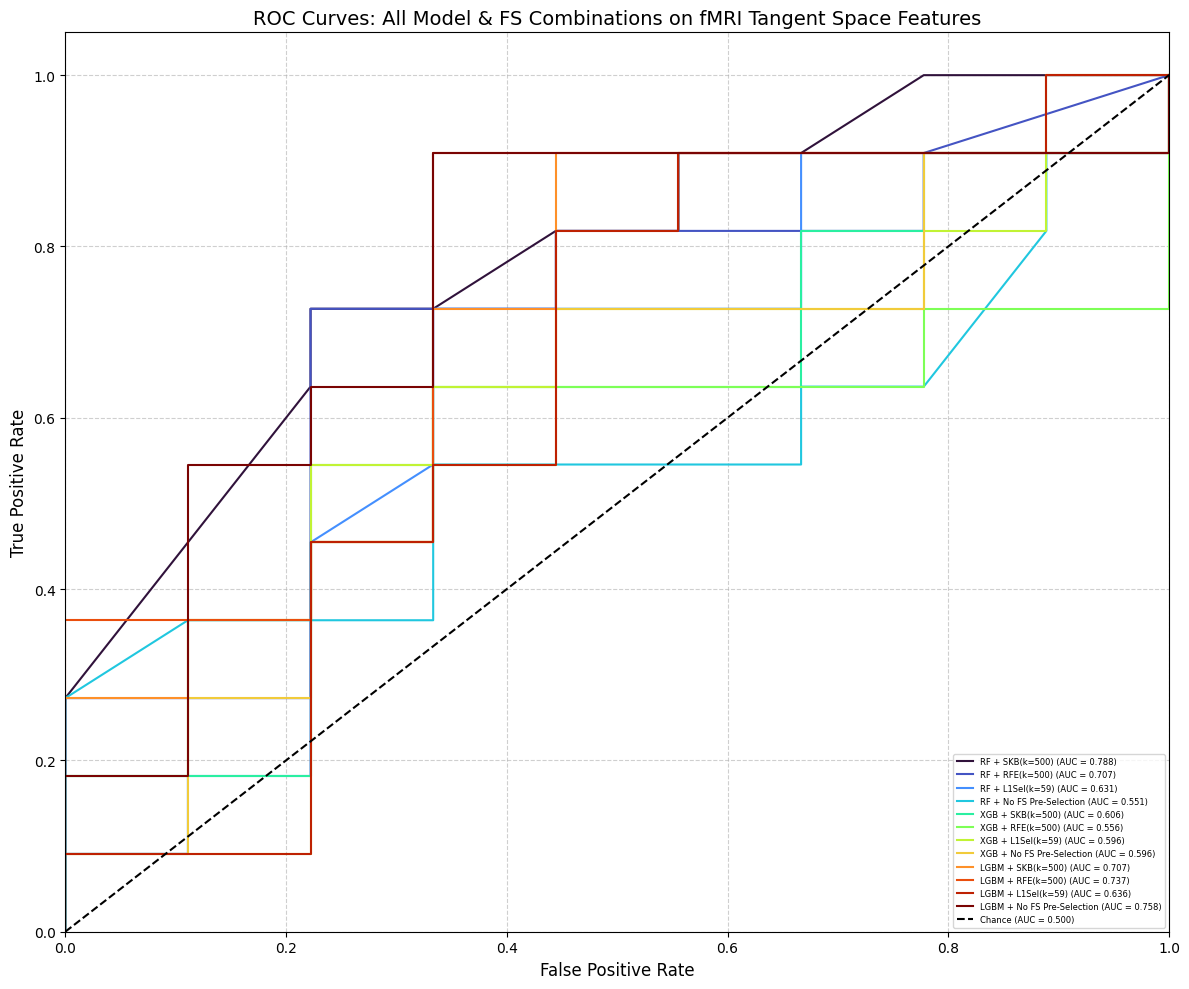


--- ROC Plot Generation Complete (12 pipelines plotted) ---


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

import pickle
with open('/content/drive/MyDrive/Colab Notebooks/ML_Project/fmri-tangent-features.pkl', 'rb') as file:
    tangent_features = pickle.load(file)

# Configuration
TEST_SIZE = 0.2
RANDOM_STATE = 42
K_FEATURES_TARGET = 500   # k for SelectKBest/RFE
C_L1_SELECTOR = 1.0     # Default C for L1 selector
RF_N_ESTIMATORS = 200
XGB_N_ESTIMATORS = 200
XGB_LR = 0.05
XGB_MAX_DEPTH = 5
LGBM_N_ESTIMATORS = 200
LGBM_LR = 0.05
LGBM_MAX_DEPTH = 5

print(f"--- Configuration ---")
print(f"Test Size: {TEST_SIZE}, Random State: {RANDOM_STATE}")
print(f"Target k for SKB/RFE: {K_FEATURES_TARGET}")
print(f"C for L1 Selector: {C_L1_SELECTOR}")
print("-" * 21)

# Load Data
try:
    if 'tangent_features' not in locals() and 'tangent_features' not in globals(): raise NameError("'tangent_features' variable not found.")
    if isinstance(tangent_features, pd.DataFrame): X_original_features = tangent_features.values
    elif not isinstance(tangent_features, np.ndarray): X_original_features = np.array(tangent_features)
    else: X_original_features = tangent_features
    if 'labels' not in locals() and 'labels' not in globals(): raise NameError(f"'labels' variable not found.")
    if not isinstance(labels, np.ndarray): y_original_labels = np.array(labels)
    else: y_original_labels = labels
    if X_original_features.shape[0] != len(y_original_labels): raise ValueError("Shape mismatch")
    if X_original_features.ndim != 2: raise ValueError("Features must be 2D")
    print(f"Validated ORIGINAL fMRI features ('tangent_features') shape: {X_original_features.shape}")
    n_original_features = X_original_features.shape[1]
except (NameError, FileNotFoundError, ValueError) as e:
    print(f"--- ERROR LOADING/VALIDATING DATA: {e} --- Using dummy data. ---")
    n_samples, n_original_features = 100, 1000 # Dummy data
    X_original_features = np.random.rand(n_samples, n_original_features)
    y_original_labels = np.random.randint(0, 2, n_samples)
    print(f"Using dummy data. Shape: {X_original_features.shape}")

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_original_features, y_original_labels, test_size=TEST_SIZE,
    random_state=RANDOM_STATE, stratify=y_original_labels
)
print(f"\nData split complete.")

# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Data scaled. Train shape: {X_train_scaled.shape}")

# Define Models
models = {
    'RF': RandomForestClassifier(n_estimators=RF_N_ESTIMATORS, random_state=RANDOM_STATE, n_jobs=-1),
    'XGB': xgb.XGBClassifier(n_estimators=XGB_N_ESTIMATORS, learning_rate=XGB_LR, max_depth=XGB_MAX_DEPTH,
                             random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss', n_jobs=-1),
    'LGBM': lgb.LGBMClassifier(n_estimators=LGBM_N_ESTIMATORS, learning_rate=LGBM_LR, max_depth=LGBM_MAX_DEPTH,
                               random_state=RANDOM_STATE, n_jobs=-1, verbosity=-1)

}
print(f"\nModels defined: {list(models.keys())}")

# Define Distinct Feature Selector Types
k_features = min(K_FEATURES_TARGET, n_original_features)
if k_features < K_FEATURES_TARGET: print(f"Warning: Requested k={K_FEATURES_TARGET} features, using actual k={k_features}.")

# RFE Estimator
rfe_estimator = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=RANDOM_STATE)

# L1 Selector Model
l1_selector_model = LogisticRegression(penalty='l1', solver='saga', max_iter=5000, C=C_L1_SELECTOR, random_state=RANDOM_STATE)

distinct_selectors = {
    f'SKB(k={k_features})': SelectKBest(f_classif, k=k_features),
    f'RFE(k={k_features})': RFE(estimator=rfe_estimator, n_features_to_select=k_features, step=50),
    f'L1Select(C={C_L1_SELECTOR})': l1_selector_model,
    'None': None
}
print(f"Distinct selector types defined: {list(distinct_selectors.keys())}")


# Create the plot
plt.figure(figsize=(12, 10))
n_pipelines = len(models) * len(distinct_selectors)
colors = plt.cm.turbo(np.linspace(0, 1, n_pipelines))
color_idx = 0
print("\n--- Starting Pipeline Evaluation (All Combinations for fMRI) ---")

# Nested Loops for All Combinations
for model_name, model_instance in models.items():
    for selector_name, selector_instance in distinct_selectors.items():
        print("-" * 35)
        print(f"Processing Pipeline: {model_name} + {selector_name}")

        X_train_sel = X_train_scaled
        X_test_sel = X_test_scaled
        actual_k = n_original_features
        current_label = f"{model_name} + {selector_name}"

        try:
            # Apply feature selection
            if selector_name == 'None':
                print("Applying no explicit feature selection.")
                actual_k = n_original_features
                current_label = f"{model_name} + No FS Pre-Selection"

            elif selector_name.startswith('L1Select'):
                print(f"Applying L1 pre-selection (via SelectFromModel)...")
                l1_model_for_selection = selector_instance
                print("  (Fitting L1 model for SelectFromModel prefit)...")
                l1_model_for_selection.fit(X_train_scaled, y_train)
                selector_wrapper = SelectFromModel(l1_model_for_selection, prefit=True, threshold=1e-5)
                X_train_sel = selector_wrapper.transform(X_train_scaled)
                X_test_sel = selector_wrapper.transform(X_test_scaled)
                actual_k = X_train_sel.shape[1]
                if actual_k == 0:
                   print(f"WARNING: L1 selector (C={C_L1_SELECTOR}) removed all features. Skipping.")
                   continue
                current_label = f"{model_name} + L1Sel(k={actual_k})"

            else: # Handling SKB and RFE
                print(f"Applying {selector_name}...")
                fs_instance = selector_instance
                X_train_sel = fs_instance.fit_transform(X_train_scaled, y_train)
                X_test_sel = fs_instance.transform(X_test_scaled)
                actual_k = X_train_sel.shape[1]

            # Checking if features remain
            if actual_k == 0:
                print(f"WARNING: Feature selection for {current_label} removed ALL features. Skipping.")
                continue

            print(f"Shape after selection: Train={X_train_sel.shape}, Test={X_test_sel.shape}")

            # Train the final model
            print(f"Training {model_name}...")
            current_model = model_instance
            current_model.fit(X_train_sel, y_train)

            # Get predictions
            print("Predicting probabilities...")
            # Checking if model supports predict_proba
            if not hasattr(current_model, 'predict_proba'):
                 print(f"WARNING: Model {model_name} does not have predict_proba. Skipping ROC for this pipeline.")
                 continue
            y_prob = current_model.predict_proba(X_test_sel)[:, 1]

            # Calculate and plot the ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            plot_label = f'{current_label} (AUC = {roc_auc:.3f})'
            plt.plot(fpr, tpr, color=colors[color_idx], lw=1.5, label=plot_label)
            print(f"--> Pipeline AUC: {roc_auc:.4f}")
            color_idx += 1

        except MemoryError as me: print(f"!!! MEMORY ERROR processing pipeline {current_label}: {me}")
        except ValueError as ve: print(f"!!! VALUE ERROR processing pipeline {current_label}: {ve}")
        except Exception as e: print(f"!!! An unexpected error occurred processing pipeline {current_label}: {e}")


# Add plot details
plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--', label='Chance (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves: All Model & FS Combinations on fMRI Tangent Space Features', fontsize=14)
plt.legend(loc='lower right', fontsize=6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(f"\n--- ROC Plot Generation Complete ({color_idx} pipelines plotted) ---")

**ROC for Fused**

Loaded fMRI data. Shape: (787, 1702)
Loaded DWI data. Shape: (787, 1189)
Loaded labels. Shape: (787,)

Features scaled individually.
Fused feature matrix shape: (787, 2891)
Data split (80% train, 20% test).
Train shape: (629, 2891), Test shape: (158, 2891)

Training Linear SVM (C=1.0) on fused features...
Predicting probabilities for ROC curve...

AUC for Fused Features + Linear SVM: 0.9750


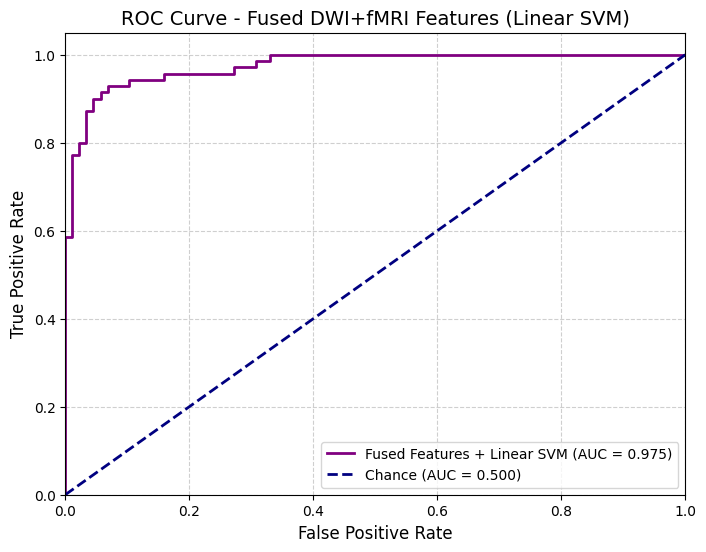


--- ROC Plot Generation Complete ---


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Configuration
TEST_SIZE = 0.2
RANDOM_STATE = 42
SVM_C = 1.0 # Default C for SVM

# Load Data
fmri_file = '/content/drive/MyDrive/Colab Notebooks/ML_Project/selected_tangent_embeddings.npy'
dwi_file = '/content/drive/MyDrive/Colab Notebooks/ML_Project/selected_l1_features_embeddings.npy'
label_file = '/content/drive/MyDrive/Colab Notebooks/ML_Project/dwi-labels.npy'

try:
    X_fmri = np.load(fmri_file)
    X_dwi = np.load(dwi_file)
    labels = np.load(label_file)
    print(f"Loaded fMRI data. Shape: {X_fmri.shape}")
    print(f"Loaded DWI data. Shape: {X_dwi.shape}")
    print(f"Loaded labels. Shape: {labels.shape}")
    if X_fmri.shape[0] != labels.shape[0] or X_dwi.shape[0] != labels.shape[0]:
        raise ValueError("Sample count mismatch between features and labels.")
except FileNotFoundError as e:
    print(f"--- ERROR LOADING DATA: {e} --- Using dummy data. ---")
    n_samples, n_fmri_feat, n_dwi_feat = 100, 50, 70 # Dummy data
    X_fmri = np.random.rand(n_samples, n_fmri_feat)
    X_dwi = np.random.rand(n_samples, n_dwi_feat)
    labels = np.random.randint(0, 2, n_samples)
    print(f"Using dummy data. Shapes: fMRI={X_fmri.shape}, DWI={X_dwi.shape}, Labels={labels.shape}")
except ValueError as e:
     print(f"--- ERROR VALIDATING DATA: {e} --- Please check input files. Exiting. ---")
     exit()

# Feature Scaling
scaler_fmri = StandardScaler()
scaler_dwi = StandardScaler()
X_fmri_scaled = scaler_fmri.fit_transform(X_fmri)
X_dwi_scaled = scaler_dwi.fit_transform(X_dwi)
print("\nFeatures scaled individually.")

# Feature Fusion
X_fused = np.hstack([X_fmri_scaled, X_dwi_scaled])
print("Fused feature matrix shape:", X_fused.shape)

# Train/Test Split (on Fused Features)
X_train, X_test, y_train, y_test = train_test_split(
    X_fused, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=labels
)
print(f"Data split ({int((1-TEST_SIZE)*100)}% train, {int(TEST_SIZE*100)}% test).")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Train Linear SVM (Enabling Probability)
print(f"\nTraining Linear SVM (C={SVM_C}) on fused features...")
clf_fused = SVC(kernel='linear', probability=True, random_state=RANDOM_STATE, C=SVM_C)
clf_fused.fit(X_train, y_train)

# Evaluation
# y_pred = clf_fused.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy on fused features: {accuracy:.4f}")

# Get Probabilities for ROC Curve
print("Predicting probabilities for ROC curve...")
# Predict probability of the positive class (class 1)
y_prob_fused = clf_fused.predict_proba(X_test)[:, 1]

# Calculate ROC and AUC
fpr_fused, tpr_fused, thresholds_fused = roc_curve(y_test, y_prob_fused)
roc_auc_fused = auc(fpr_fused, tpr_fused)
print(f"\nAUC for Fused Features + Linear SVM: {roc_auc_fused:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_fused, tpr_fused, color='purple', lw=2,
         label=f'Fused Features + Linear SVM (AUC = {roc_auc_fused:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Fused DWI+fMRI Features (Linear SVM)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- ROC Plot Generation Complete ---")